In [ ]:
#Implementation for Task 1
#using sirs broilerplate code as a template

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import tensorflow as tf  
import pandas as pd
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [2]:
import os

# Load and preprocess the data
data = []  # List to store image data
labels = []  # List to store labels

# Define a function to extract the person label from the file name
def extract_person_label(file_name):
    return int(file_name.split('.')[0].replace('subject', '')) - 1  # Subtract 1 to make labels start from 0

# Load data and labels
# Assuming the dataset files are in the 'dataset' directory
dataset_dir = 'D:/FAST_NUCES/7thSemester/DLP/Assignment/Assignment1/Dataset/yale'

for file_name in os.listdir(dataset_dir):
    img = plt.imread(os.path.join(dataset_dir, file_name))
    # print(img.shape)
    data.append(img.flatten())  # Flatten image into a 1D array
    labels.append(extract_person_label(file_name))

data = np.array(data)
labels = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


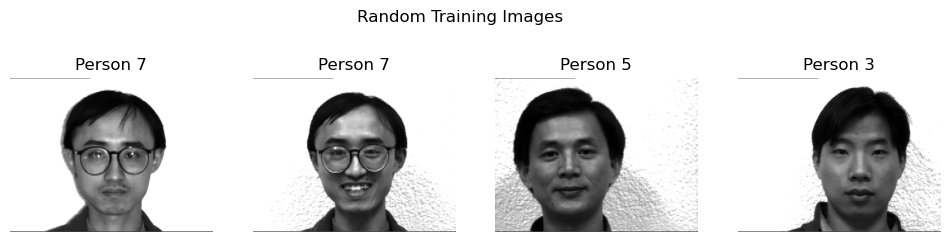

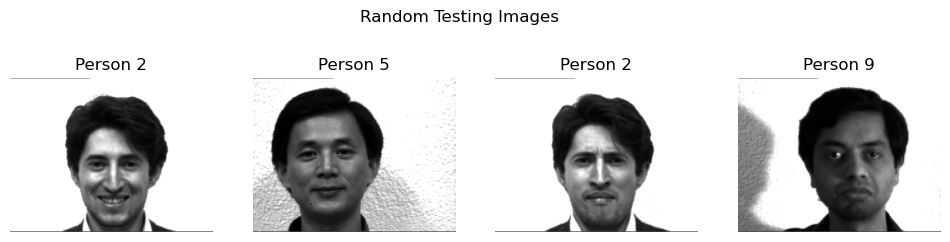

In [3]:
import random

# Randomly select four indices from the training dataset
train_indices = random.sample(range(len(X_train)), 4)

# Randomly select four indices from the testing dataset
test_indices = random.sample(range(len(X_test)), 4)

# Function to display images
def display_images(images, labels, title):
    plt.figure(figsize=(12, 3))
    plt.suptitle(title)
    for i, (image, label) in enumerate(zip(images, labels), 1):
        plt.subplot(1, 4, i)
        plt.imshow(image.reshape((243, 320)), cmap='gray')
        plt.title(f"Person {label}")
        plt.axis('off')
    plt.show()

# Display four random training images
train_images_to_display = X_train[train_indices]
train_labels_to_display = y_train[train_indices]
display_images(train_images_to_display, train_labels_to_display, "Random Training Images")

# Display four random testing images
test_images_to_display = X_test[test_indices]
test_labels_to_display = y_test[test_indices]
display_images(test_images_to_display, test_labels_to_display, "Random Testing Images")

In [12]:
# Define a function to create the MLP model
def create_mlp_model(hidden_layers, neurons_per_layer, activation_function):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))

    for _ in range(hidden_layers): #reminder to self _ means we dont expect the variable itself to be used in the loop.
        model.add(tf.keras.layers.Dense(neurons_per_layer, activation=activation_function))

    model.add(tf.keras.layers.Dense(15, activation='softmax'))  # 15 output classes for 15 subjects
    
    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [13]:
# Function to train and evaluate the MLP model
def train_evaluate_mlp(hidden_layers, neurons_per_layer, activation_function, epochs=20, batch_size=32):
    model = create_mlp_model(hidden_layers, neurons_per_layer, activation_function)
    
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)
    
    # Test the model and calculate evaluation metrics
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    accuracy = accuracy_score(y_test, y_pred_classes)
    precision = precision_score(y_test, y_pred_classes, average='macro')
    recall = recall_score(y_test, y_pred_classes, average='macro')
    f1 = f1_score(y_test, y_pred_classes, average='macro')
    
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1-score: {f1:.2f}')

    return accuracy, precision, recall, f1, history


In [14]:
# Experiment 2: With hyperparameter tuning (GridSearchCV)
param_grid = {
    'hidden_layers': [1, 2, 3],
    'neurons_per_layer': [32, 64, 128],
    'activation_function': ['relu', 'sigmoid']
}

# Create an instance of your MLP model
#mlp_model = create_mlp_model(hidden_layers=2, neurons_per_layer=64, activation_function='relu')
#Note to future self- making this instance does not force GridSearchCV to use these settings. It is just a template for the architecture you're using.
#instead it will use the param_grid to find the best settings.
#That didn't work but the logic behind my statements remains the same.

mlp_classifier = KerasClassifier(build_fn=create_mlp_model, epochs=20, batch_size=32) 


# Initialize GridSearchCV with the MLP model as the estimator
grid_search = GridSearchCV(estimator=mlp_classifier,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=3)

# Fit the GridSearchCV object
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

accuracy2, precision2, recall2, f1_2, history2 = train_evaluate_mlp(**best_params, epochs=20, batch_size=32)


Epoch 1/20


C:\Users\rahei\AppData\Local\Temp\ipykernel_18616\2438970920.py:14: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  mlp_classifier = KerasClassifier(build_fn=create_mlp_model, epochs=20, batch_size=32)


3/3 [==============================] - 0s 10ms/step - loss: 11008.6396 - accuracy: 0.0682
Epoch 2/20
3/3 [==============================] - 0s 11ms/step - loss: 19915.6895 - accuracy: 0.0682
Epoch 3/20
3/3 [==============================] - 0s 10ms/step - loss: 9170.6436 - accuracy: 0.1136
Epoch 4/20
3/3 [==============================] - 0s 10ms/step - loss: 6840.8198 - accuracy: 0.1136
Epoch 5/20
3/3 [==============================] - 0s 7ms/step - loss: 3302.7471 - accuracy: 0.2727
Epoch 6/20
3/3 [==============================] - 0s 10ms/step - loss: 2594.0186 - accuracy: 0.2500
Epoch 7/20
3/3 [==============================] - 0s 10ms/step - loss: 682.0266 - accuracy: 0.2273
Epoch 8/20
3/3 [==============================] - 0s 10ms/step - loss: 24.5210 - accuracy: 0.1023
Epoch 9/20
3/3 [==============================] - 0s 10ms/step - loss: 2.7084 - accuracy: 0.0795
Epoch 10/20
3/3 [==============================] - 0s 13ms/step - loss: 2.7083 - accuracy: 0.0795
Epoch 11/20
3/3 [=

In [15]:
#Experiment Tracking
experiments = []

# Experiment 1: Without hyperparameter tuning
accuracy1, precision1, recall1, f1_1, history1 = train_evaluate_mlp(hidden_layers=2, neurons_per_layer=64, activation_function='relu', epochs=20, batch_size=32)

# Experiment 2: With hyperparameter tuning (GridSearchCV)
# ...

experiments.append(("Without Tuning", accuracy1, precision1, recall1, f1_1, history1))
experiments.append(("With Tuning", accuracy2, precision2, recall2, f1_2, history2))


2/2 [==============================] - 0s 2ms/step
Accuracy: 0.30
Precision: 0.19
Recall: 0.30
F1-score: 0.21


d:\Anaconda\ActualInstallation\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
experiments[1]

('With Tuning',
 0.7878787878787878,
 0.8511904761904763,
 0.8250000000000001,
 0.7913832199546486,
 <keras.callbacks.History at 0x16e02645f70>)

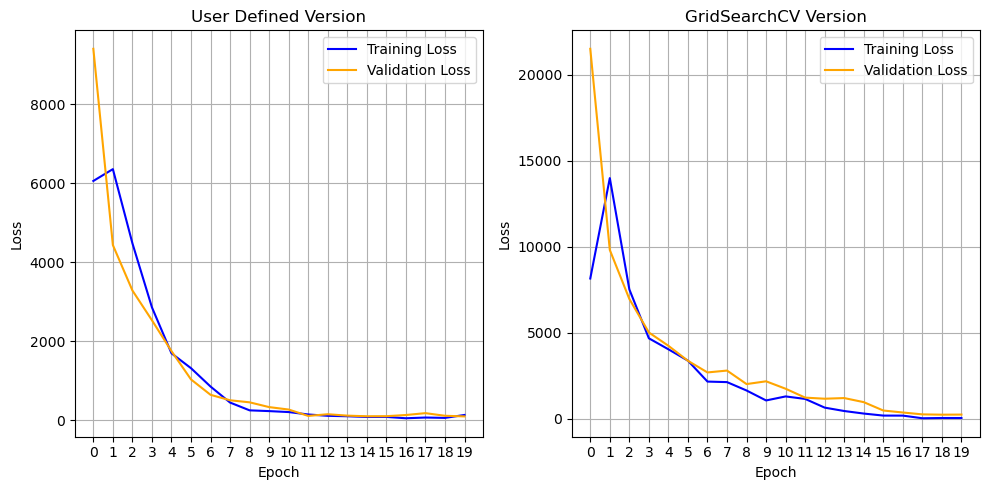

In [23]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot the training and validation loss of version 1 on the first subplot
ax1.plot(history1.history['loss'], label='Training Loss', color='blue')
ax1.plot(history1.history['val_loss'], label='Validation Loss', color='orange')
ax1.set_title("User Defined Version")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()
ax1.grid(True)

# Set the x-axis ticks by increments of 1 for the first subplot
ax1.set_xticks(np.arange(min(history1.epoch), max(history1.epoch)+1, 1))
ax1.set_xticklabels(np.arange(min(history1.epoch), max(history1.epoch)+1, 1))

# Plot the training and validation loss of version 2 on the second subplot
ax2.plot(history2.history['loss'], label='Training Loss', color='blue')
ax2.plot(history2.history['val_loss'], label='Validation Loss', color='orange')
ax2.set_title("GridSearchCV Version")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Loss")
ax2.legend()
ax2.grid(True)

# Set the x-axis ticks by increments of 1 for the second subplot
ax2.set_xticks(np.arange(min(history2.epoch), max(history2.epoch)+1, 1))
ax2.set_xticklabels(np.arange(min(history2.epoch), max(history2.epoch)+1, 1))

# Adjust the spacing between the subplots
plt.tight_layout()

# Show the figure
plt.show()
